In [2]:
# Import libraries

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import h5py

# Read and transform data
filename = 'SVHN_single_grey1.h5'
h5f = h5py.File(filename, 'r')
print("Keys: %s" % h5f.keys())

Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


In [3]:
#Load the training and test set|

X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val=h5f['X_val'][:]
y_val=h5f['y_val'][:]

In [4]:
# Reshaping the dataset
X_train = X_train.reshape(X_train.shape[0],1024)
X_test = X_test.reshape(X_test.shape[0],1024)
X_val = X_val.reshape(X_val.shape[0],1024)

In [5]:
# normalising inputs from 0-255 to 0-1
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

In [6]:
# show the sizes of each data split

print("training data points: {}".format(len(y_train)))
print("validation data points: {}".format(len(y_val)))
print("testing data points: {}".format(len(y_test)))

training data points: 42000
validation data points: 60000
testing data points: 18000


In [7]:
nDigits = 10

yOneHot = np.zeros([y_train.shape[0],nDigits])
for i in range(y_train.shape[0]):
    yOneHot[i,y_train[i].astype(int)]=1

y_train = yOneHot

In [8]:
nDigits = 10

yOneHot = np.zeros([y_test.shape[0],nDigits])
for i in range(y_test.shape[0]):
    yOneHot[i,y_test[i].astype(int)]=1

y_test = yOneHot

In [9]:
np.random.seed(1002)

In [10]:
# Define activation, loss, and their derivatives

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z):
    return z * (1-z)

def relu (x):
    return np.maximum(0,x) # ReLU is very simple

def relu_derivative(x):
    return 0.5 * (np.sign(x)+1) # ReLU derivative is either zero or 1.

def CrossEntropyLoss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum

    return L

def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis=0)

def CE_Softmax_Derivative(output, ideal_output):
    return output - ideal_output

In [12]:
inputDim = X_train.shape[1]
nHidden = 64
learning_rate = 1
weight_decay = 0.001

W1 = 0.01*np.random.randn(nHidden, inputDim)
b1 = np.zeros((nHidden, 1))
W2 = 0.01*np.random.randn(nDigits, nHidden)
b2 = np.zeros((nDigits, 1))

inputData = X_train
y = y_train

Epoch 0 cost:  2.3026330679545675
Epoch 10 cost:  2.3023075400996746
Epoch 20 cost:  2.3019958827832485
Epoch 30 cost:  2.301542100314957
Epoch 40 cost:  2.300814672863413
Epoch 50 cost:  2.2992446227378847
Epoch 60 cost:  2.2963666897041506
Epoch 70 cost:  2.2939653980516628
Epoch 80 cost:  2.2964184883900822
Epoch 90 cost:  2.2962432167522686


<function matplotlib.pyplot.show(*args, **kw)>

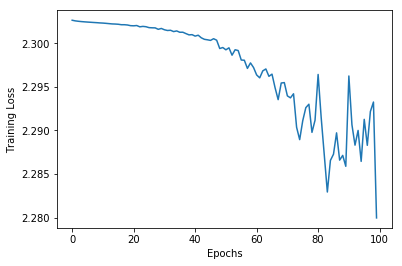

In [14]:
# Iteration 1
nEpochs = 100
costPlot = np.zeros(nEpochs)
m = 42000
for i in range(nEpochs):

    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost

    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show

Epoch 0 cost:  2.247811112597606
Epoch 10 cost:  2.245343106286216
Epoch 20 cost:  2.242870961024984
Epoch 30 cost:  2.2403969380859223
Epoch 40 cost:  2.2379237854384333
Epoch 50 cost:  2.2354480734350313
Epoch 60 cost:  2.23296598470064
Epoch 70 cost:  2.2304621325507696
Epoch 80 cost:  2.227940260211873
Epoch 90 cost:  2.2253573526041666
[[ 515  118   63  112  365  380  484   75  476  488]
 [ 998  892  976  983 1031 1045  916  922 1007  990]
 [   8    7    7   14   20   13    2    3    6    6]
 [  24   71   50   42   63   60   23   41   26   33]
 [   0    0    0    0    0    0    0    0    0    0]
 [  27  101   44   38   60   42   44   45   31   42]
 [  90    3    2    4   39   40  165    0  114   39]
 [ 131  628  636  427  188  138  185  715  116  142]
 [   1    0    1    7    1    0    1    0    1    1]
 [  20    8   24   92   45   50   12    7   35   63]]
              precision    recall  f1-score   support

           0       0.28      0.17      0.21      3076
           1     

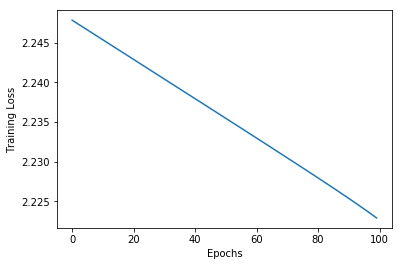

In [33]:
# Iteration 2

nEpochs = 100
nHidden = 64
weight_decay = 0.001
learning_rate = 0.1
costPlot = np.zeros(nEpochs)
m = 42000
for i in range(nEpochs):

    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost

    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show
Z1 = np.matmul(W1, X_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2
predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)
print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

Epoch 0 cost:  2.2182691013848506
Epoch 10 cost:  2.293004977438482
Epoch 20 cost:  2.2588011730524915
Epoch 30 cost:  2.260006007101296
Epoch 40 cost:  2.277190118563725
Epoch 50 cost:  2.2656483909445106
Epoch 60 cost:  2.289082406855259
Epoch 70 cost:  2.2514908610119146
Epoch 80 cost:  2.2494896379812475
Epoch 90 cost:  2.260425683896998
[[  1   0   0   0   0   0   1   0   0   1]
 [ 33   4   3  14  36  22  40   1  53  41]
 [  0   0   0   0   0   0   0   0   0   0]
 [104 186 167 135 125 118 110 162 109 128]
 [  0   0   0   0   0   0   0   0   0   0]
 [208 402 360 294 324 234 174 410 222 236]
 [873 354 488 532 573 750 959 391 852 731]
 [557 881 782 735 732 625 507 843 530 622]
 [ 38   1   3   9  22  19  41   1  46  45]
 [  0   0   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.33      0.00         3
           1       0.00      0.02      0.00       247
           2       0.00      0.00      0.00         0
        

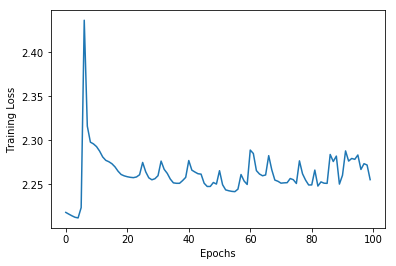

In [35]:
# Iteration 3

nEpochs = 100
nHidden = 64
weight_decay = 0.001
learning_rate = 0.5
costPlot = np.zeros(nEpochs)
m = 42000
for i in range(nEpochs):

    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost

    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show
Z1 = np.matmul(W1, X_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2
predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)
print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

Epoch 0 cost:  2.2795777168465463
Epoch 10 cost:  2.235613817740789
Epoch 20 cost:  2.2330428842764567
Epoch 30 cost:  2.2303805470232305
Epoch 40 cost:  2.227309275519711
Epoch 50 cost:  2.223619349474885
Epoch 60 cost:  2.2202214413578756
Epoch 70 cost:  2.217655442864041
Epoch 80 cost:  2.2153289086207235
Epoch 90 cost:  2.2130584793398365
Epoch 100 cost:  2.210783434534599
Epoch 110 cost:  2.2083227726036845
Epoch 120 cost:  2.206144852466767
Epoch 130 cost:  2.203990862059055
Epoch 140 cost:  2.2018599609163023
Epoch 150 cost:  2.1997529535550715
Epoch 160 cost:  2.1976654141849714
Epoch 170 cost:  2.1955966218735012
Epoch 180 cost:  2.1935449753796217
Epoch 190 cost:  2.1915086811301165
[[ 454   44   44   49  193   67  138   23  164  415]
 [  44  298  251  190  134   96   55  191   55   92]
 [   2    3    6    2    1    1    3    4    0    4]
 [  97  113  119  145  151  146   74  102  101   86]
 [  63   73   68  101  113   77   55   49   64   71]
 [ 186   96  141  188  205  211  

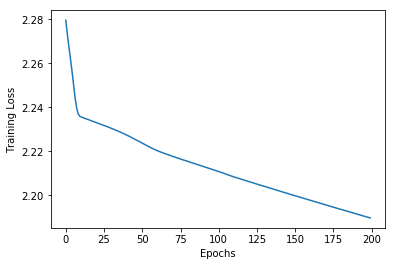

In [36]:
# Iteration 4


nEpochs = 200
nHidden = 64
weight_decay = 0.001
learning_rate = 0.1
costPlot = np.zeros(nEpochs)
m = 42000
for i in range(nEpochs):

    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost

    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show
Z1 = np.matmul(W1, X_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2
predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)
print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

Epoch 0 cost:  2.1894923203082177
Epoch 10 cost:  2.187512430475638
Epoch 20 cost:  2.1859999185473216
Epoch 30 cost:  2.1880059301590498
Epoch 40 cost:  2.186668173266121
Epoch 50 cost:  2.185144004250808
Epoch 60 cost:  2.183634531529643
Epoch 70 cost:  2.182096568851474
Epoch 80 cost:  2.180584873341062
Epoch 90 cost:  2.179033208532992
Epoch 100 cost:  2.1775996317860633
Epoch 110 cost:  2.175941059480302
Epoch 120 cost:  2.174375020992469
Epoch 130 cost:  2.172826569659781
Epoch 140 cost:  2.1712283206398073
Epoch 150 cost:  2.169623502638091
Epoch 160 cost:  2.1679889236140446
Epoch 170 cost:  2.1662982651235647
Epoch 180 cost:  2.164660498008663
Epoch 190 cost:  2.1629968227152916
[[ 476   41   31   35  135   43  109   17  103  387]
 [  40  373  248  205  141   92   46  177   44   87]
 [  12   31   35    4    3    6    6   16    4   14]
 [  89  200  222  189  146  143   61  196   95  106]
 [  57   74   73  118  200   82   69   50  101   89]
 [ 192  214  248  289  282  277  169  

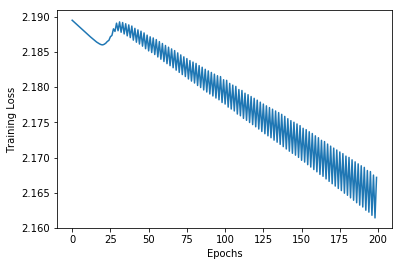

In [37]:
# Iteration 5

nEpochs = 200
nHidden = 128
weight_decay = 0.001
learning_rate = 0.1
costPlot = np.zeros(nEpochs)
m = 42000
for i in range(nEpochs):

    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost

    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show
Z1 = np.matmul(W1, X_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2
predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)
print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

Epoch 0 cost:  2.161080829834096
Epoch 10 cost:  2.1579138093485604
Epoch 20 cost:  2.1546372452420965
Epoch 30 cost:  2.151300032197129
Epoch 40 cost:  2.1478669578215976
Epoch 50 cost:  2.1439942809968744
Epoch 60 cost:  2.1384310643985587
Epoch 70 cost:  2.131050684910987
Epoch 80 cost:  2.127026587868446
Epoch 90 cost:  2.122917891320323
Epoch 100 cost:  2.1186003773864264
Epoch 110 cost:  2.114560848230229
Epoch 120 cost:  2.110459132883965
Epoch 130 cost:  2.1059711171080573
Epoch 140 cost:  2.1013172289715407
Epoch 150 cost:  2.0969404466086146
Epoch 160 cost:  2.0922105508427458
Epoch 170 cost:  2.087707458777477
Epoch 180 cost:  2.0831512317706173
Epoch 190 cost:  2.0784706145134715
[[ 524   60   24   44  103   47  102   18   89  384]
 [  66  527  235  150  117  100   62  228   62   95]
 [   7   26  118   55    4   10    6   45    4   14]
 [  72  204  241  323  122  133   46  198   91  117]
 [  84  153   89   91  444   66   86   57  106  108]
 [ 225  192  266  374  335  415  1

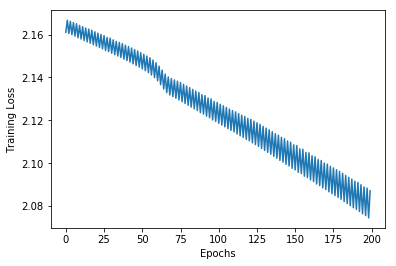

In [38]:
# Iteration 6

nEpochs = 200
nHidden = 64
weight_decay = 0.0001
learning_rate = 0.1
costPlot = np.zeros(nEpochs)
m = 42000
for i in range(nEpochs):

    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost

    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show
Z1 = np.matmul(W1, X_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2
predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)
print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

Epoch 0 cost:  2.1156353842228612
Epoch 10 cost:  2.114106835234838
Epoch 20 cost:  2.1126580003245987
Epoch 30 cost:  2.1112692825807087
Epoch 40 cost:  2.1099296900769517
Epoch 50 cost:  2.108627361879432
Epoch 60 cost:  2.1073568863434073
Epoch 70 cost:  2.1061125840828634
Epoch 80 cost:  2.1048888362293754
Epoch 90 cost:  2.103680638436658
Epoch 100 cost:  2.102486180561918
Epoch 110 cost:  2.101302839116628
Epoch 120 cost:  2.1001272046923933
Epoch 130 cost:  2.098957984078586
Epoch 140 cost:  2.0977944529174093
Epoch 150 cost:  2.0966356727841733
Epoch 160 cost:  2.095482221655189
Epoch 170 cost:  2.0943324387422613
Epoch 180 cost:  2.093186417197295
Epoch 190 cost:  2.092043701890007
[[ 449   30   15   26   52   32   80   13   76  320]
 [ 119  636  281  196  187  131   97  238  105  157]
 [  34   50   94   69   11   26   13   39   13   47]
 [  66   75  101  278   99  190   62   58  107   96]
 [ 114   84   49   55  520   80  115   22  145  101]
 [ 240   74  120  232  234  361  21

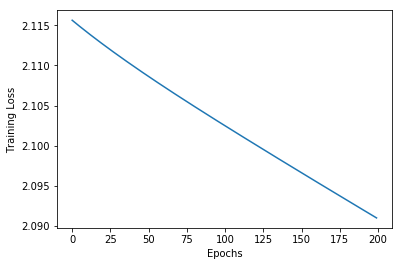

In [41]:
# Iteration 7

nEpochs = 200
nHidden = 64
weight_decay = 0.001
learning_rate = 0.05
costPlot = np.zeros(nEpochs)
m = 42000
for i in range(nEpochs):

    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost

    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show
Z1 = np.matmul(W1, X_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2
predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)
print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

Epoch 0 cost:  2.090903771019982
Epoch 10 cost:  2.089765969565354
Epoch 20 cost:  2.0886308969091103
Epoch 30 cost:  2.0874982772349395
Epoch 40 cost:  2.086368148361767
Epoch 50 cost:  2.0852404688959663
Epoch 60 cost:  2.0841151954531805
Epoch 70 cost:  2.0829930058904567
Epoch 80 cost:  2.0818736353646363
Epoch 90 cost:  2.0807561871842384
Epoch 100 cost:  2.0796411447767023
Epoch 110 cost:  2.0785294169546575
Epoch 120 cost:  2.0774209978004516
Epoch 130 cost:  2.0763160357424657
Epoch 140 cost:  2.07521427975709
Epoch 150 cost:  2.0741155571336787
Epoch 160 cost:  2.0730205878231667
Epoch 170 cost:  2.0719290878887526
Epoch 180 cost:  2.070841794130531
Epoch 190 cost:  2.0697592825089255
Epoch 200 cost:  2.068681547884544
Epoch 210 cost:  2.067609071415501
Epoch 220 cost:  2.066541631272067
Epoch 230 cost:  2.065479970083882
Epoch 240 cost:  2.0644237313750513
Epoch 250 cost:  2.0633739014715675
Epoch 260 cost:  2.0623300549708827
Epoch 270 cost:  2.0612923883081584
Epoch 280 cos

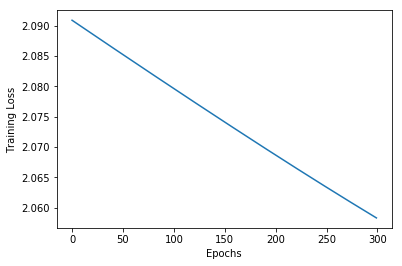

In [42]:
# Iteration 8

nEpochs = 300
nHidden = 128
weight_decay = 0.001
learning_rate = 0.05
costPlot = np.zeros(nEpochs)
m = 42000
for i in range(nEpochs):

    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost

    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show
Z1 = np.matmul(W1, X_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2
predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)
print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

# Conclusion

1) A NN model is build which is basically a feed forward neural network from scratch without using Keras.

2) We tried building the model using numpy functions and methods.

3) We tried to tune our model by changing some hyper parameters in 8 iterations. They are: nEpochs,nHidden,weight_decay and learning_rate

4) For all the combinations the best parameters are found to be :-
    nEpochs = 300 ,
    nHidden = 128 ,
    weight_decay = 0.001 and
    learning_rate = 0.05